In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re

# 데이터 불러오기

In [93]:
train = pd.read_csv('./data/train.csv')

In [94]:
test = pd.read_csv('./data/test.csv')

In [95]:
train.iloc[8300:8320]

,title,comment,bias,hate
8300,‘나혼자산다’ LA여행 중 한혜진♥전현무 비밀연애 포착,보기좋은커플 ㅎㅎㅎ 보는내내 기분좋음~!!,none,none
8301,"""'호텔 델루나' 이지은♥여진구, 결국 핀 꽃 """"예쁘다. 슬프게""""""",아이유 여진구 최고,none,none
8302,"""장성규 측 “‘마리텔2’ 생방 중 사고, 어지러움증 있지만 호전된 상태”[공식입장]""",프리된지 얼마나 됐다고 사건사고가 이렇게 많아,none,hate
8303,"""이국주, """"새로 산 옷 기분 좋았는데...뭐야, 나 천막이야""""""",국주언니같은 능력있는 천상여자가 결국 잘생기고 키크고 돈많은 남자 만나게되있음~ 꼭...,gender,hate
8304,"""[Oh!쎈 레터] 아이아이, 음이탈 망신→실력으로 논란 지울까""",야 신인이라며 ㅋㅋ 실수할 수도 있지 아이유 노래 잘하는데 유희열의 스케치북 나가서...,none,hate
8305,"""'조작 논란' 아이즈원, 쇼케이스 취소→방송 통편집…'후폭풍 ing'[종합]""",해체 수순은 당연한거고 멤버들도 알았든 몰랐든 그동안 혜택을 봤으니까 도의적인 책임...,none,none
8306,"""‘미스터션샤인’ 김태리, 유연석 만났다 “내 눈에 백정 아닌 백성”""",드라마에 욱일기 쳐넣는 감독이나 작가나 또라이들이네,none,hate
8307,"""""""달달함 1도 없어"""" '동상2' 안현모♥라이머 부부, 시작부터 '전쟁' 서막 ...",캐스팅...어쩔...잼없어...한고은 소이현꺼 보고 채널 돌림!!몇주안하고 하차할꺼 같음,none,none
8308,"""[공식] '25일 컴백' MC몽, '인기'-'샤넬' 더블타이틀 확정…트랙리스트 공개""",몽이가 그래도 사람은 착했다 ;;,none,none
8309,"""""""누굴 더 닮았나""""...'동상이몽2' 추자현♥우효광 아들 첫 공개""",속에 화가 너무 많으신듯 아이도 생기고 부모가 되셧으니 서로 존중해주고 배려해주세요...,none,hate


In [96]:
test.iloc[100:200]

,ID,title,comment
100,100,"[단독] 장성규, 입술부상→20일 '방구석1열' 녹화 불참 ""하루 빨리 복귀할게요""...",썩 그렇게 재미가 있지 않는데 알수가 없음
101,101,"[★SNS] 故 최진실 딸 준희, 이소라와 다정한 만남 '훈훈'",죽은배우 딸래미도봐야하냐?
102,102,"엄앵란, 故 신성일 추도식서 '끝내 눈물'…영천 자택에 묻히다(종합)",사랑보단 정이겠지와이프들 그렇듯이 큰아들 키우듯그냥 그렇게 가족이된거지
103,103,한지혜♥이상우 꽉 닫힌 해피엔딩..'황금정원'이 남긴 네가지,주말마다 잘봤는데^^모두들 고생하셨어요
104,104,"[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의 ...",페미코인타서 이름날리려고 발악을하네 본업에충실해서 뜰생각이나해
...,...,...,...
195,195,"[어게인TV]""오직 가족 뿐""…'황금빛' 천호진이 보여준 父성애",이거 보는 주 시청자가 40-60대인데 그 사람들은 밤 10시되면 불끄고 잔다. 시...
196,196,"[Oh!쎈 이슈] 이찬오, 결혼→1년만 이혼→마약까지 ‘3년’..★셰프의 몰락(종합)",마약 좀 할수도있지 ㅋㅋㅋ 여자가 얼마나 힘들게했으면 ㅜㅠ
197,197,"[공식입장] 한예슬 측 ""지방종 수술 중 의료사고 당해..현재 치료중""",그니까 너의 나라 미국가서 해!!
198,198,"[★타임워프] '데뷔 20주년' 신화, 소년은 어떻게 전설이 되었나","멤버 전부 결혼해서 애놓으면, 자동해체할거다"


## 리뷰 길이 분포 확인

In [97]:
train_title_length=train['title'].apply(len)

In [98]:
train_title_length=train['title'].apply(len)
train_comment_length = train['comment'].apply(len)

In [99]:
train_comment_length

0       14
1       24
2       65
3        8
4       26
        ..
8362    58
8363    71
8364    52
8365     7
8366     5
Name: comment, Length: 8367, dtype: int64

In [100]:
train_title_length 

0       42
1       56
2       38
3       36
4       60
        ..
8362    33
8363    50
8364    43
8365    32
8366    34
Name: title, Length: 8367, dtype: int64

Text(0, 0.5, 'Number of review')

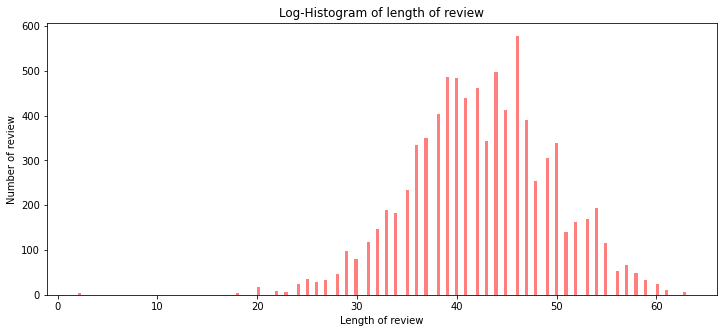

In [101]:
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_title_length, bins=200, alpha=0.5, color='r', label='word')

# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

Text(0, 0.5, 'Number of review')

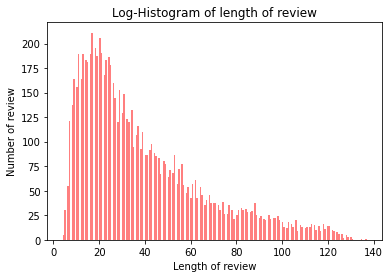

In [102]:
plt.hist(train_comment_length, bins=200, alpha=0.5, color='r', label='word')

# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

In [37]:
np.max(train_comment_length)

137

## 리뷰길이 이상치 기준 확인

In [104]:
print('리뷰 길이 최댓값:', f'{np.max(train_comment_length)}')
print('리뷰 길이 최솟값:', f'{np.min(train_comment_length)}')
print('리뷰 길이 평균값:', f'{np.mean(train_comment_length):2f}')
print('리뷰 길이 표준편차:', f'{np.std(train_comment_length):2f}')
print('리뷰 길이 중간값:', f'{np.median(train_comment_length)}')
print('리뷰 길이 제1사분위:', f'{np.percentile(train_comment_length,25)}')
print('리뷰 길이 제3사분위:', f'{np.percentile(train_comment_length,75)}')

리뷰 길이 최댓값: 137
리뷰 길이 최솟값: 4
리뷰 길이 평균값: 38.724393
리뷰 길이 표준편차: 27.157633
리뷰 길이 중간값: 31.0
리뷰 길이 제1사분위: 18.0
리뷰 길이 제3사분위: 53.0


In [105]:
print('리뷰 제목 길이 최댓값:', f'{np.max(train_title_length)}')
print('리뷰 제목 길이 최솟값:', f'{np.min(train_title_length)}')
print('리뷰 제목 길이 평균값:', f'{np.mean(train_title_length):2f}')
print('리뷰 제목 길이 표준편차:', f'{np.std(train_title_length):2f}')
print('리뷰 제목 길이 중간값:', f'{np.median(train_title_length)}')
print('리뷰 제목 길이 제1사분위:', f'{np.percentile(train_title_length,25)}')
print('리뷰 제목 길이 제3사분위:', f'{np.percentile(train_title_length,75)}')

리뷰 제목 길이 최댓값: 63
리뷰 제목 길이 최솟값: 2
리뷰 제목 길이 평균값: 42.484403
리뷰 제목 길이 표준편차: 7.081790
리뷰 제목 길이 중간값: 42.0
리뷰 제목 길이 제1사분위: 38.0
리뷰 제목 길이 제3사분위: 47.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f51880676a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5188067c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51880674f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5188073220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f51880737c0>],
 'means': [<matplotlib.lines.Line2D at 0x7f51880734f0>]}

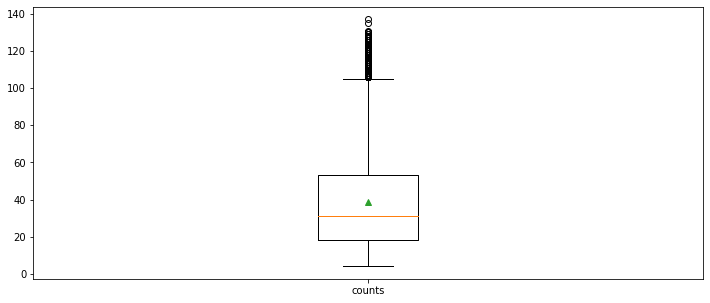

In [106]:
plt.figure(figsize=(12,5))
plt.boxplot(train_comment_length,
           labels=['counts'],
           showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f51906f8310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f519029be20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f51906f88b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f519029bd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f519029b370>],
 'means': [<matplotlib.lines.Line2D at 0x7f519029b100>]}

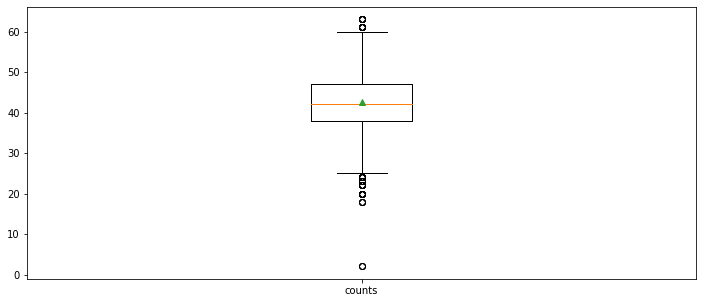

In [107]:
plt.figure(figsize=(12,5))
plt.boxplot(train_title_length,
           labels=['counts'],
           showmeans=True)

## wordcloud로 어떤 단어가 많이 나오는지 확인

In [108]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

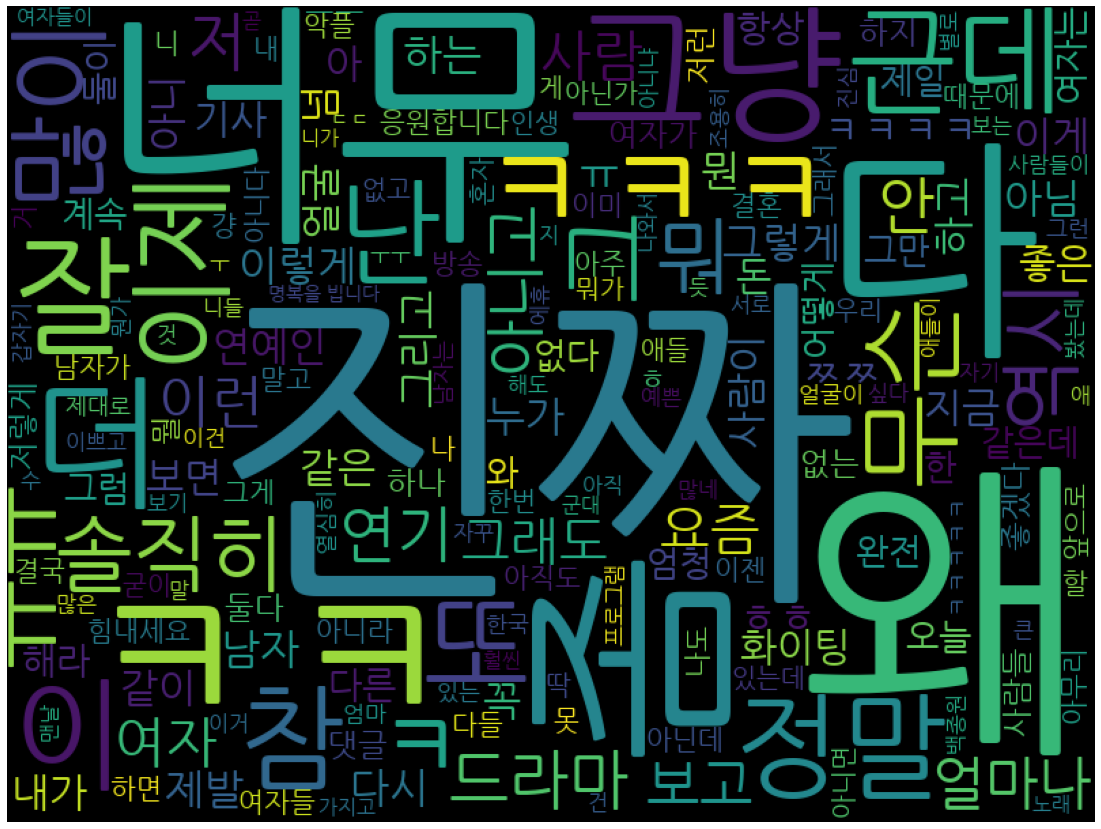

In [109]:
Cloud = WordCloud(font_path = 'usr/share/fonts/truetype/dejavu/NanumGothic.ttf',width=800,height=600).generate(" ".join(train['comment']))
plt.figure(figsize=(20,15))
plt.imshow(Cloud)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

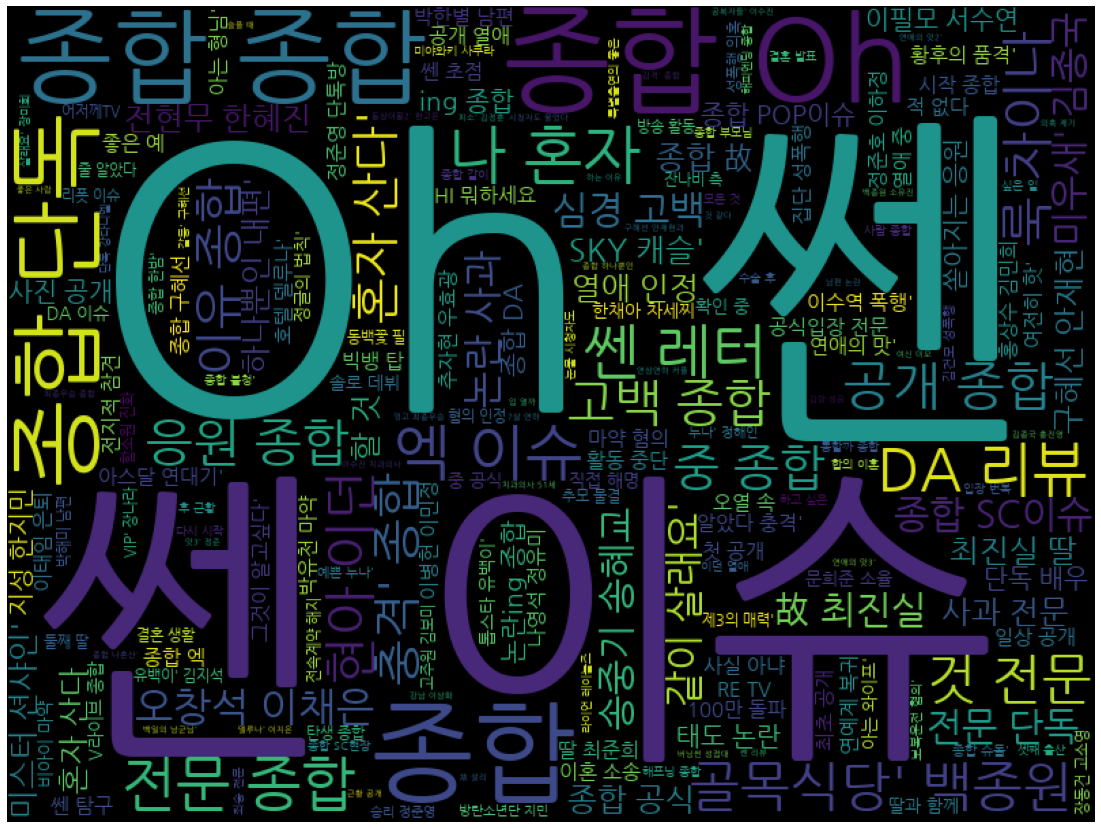

In [110]:
Cloud = WordCloud(font_path = 'usr/share/fonts/truetype/dejavu/NanumGothic.ttf',width=800,height=600).generate(" ".join(train['title']))
plt.figure(figsize=(20,15))
plt.imshow(Cloud)
plt.axis('off')

기사 제목의 종합 , 쎈, 이슈 <방송사 이름들 지워야 할 것같음

### hate bias 비율

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hate', ylabel='count'>

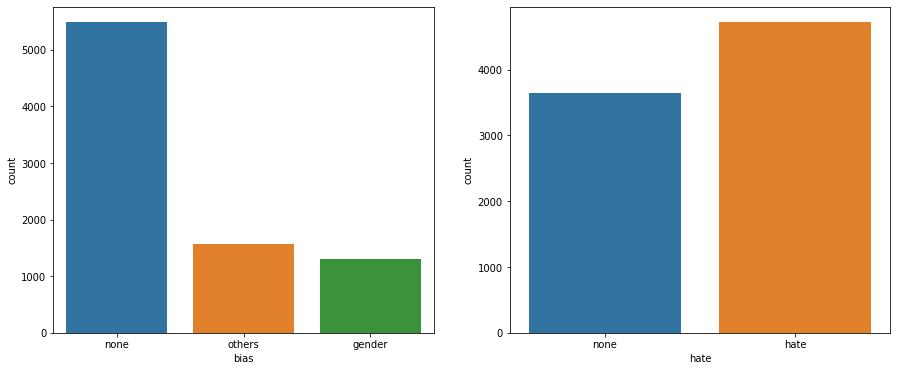

In [111]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.countplot(train['bias'], ax = axes[0])
sns.countplot( train['hate'], ax = axes[1])

### hate일 때 bias 수
hate에 분류 될 때 높은 확률로 bias도 있음

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bias', ylabel='count'>

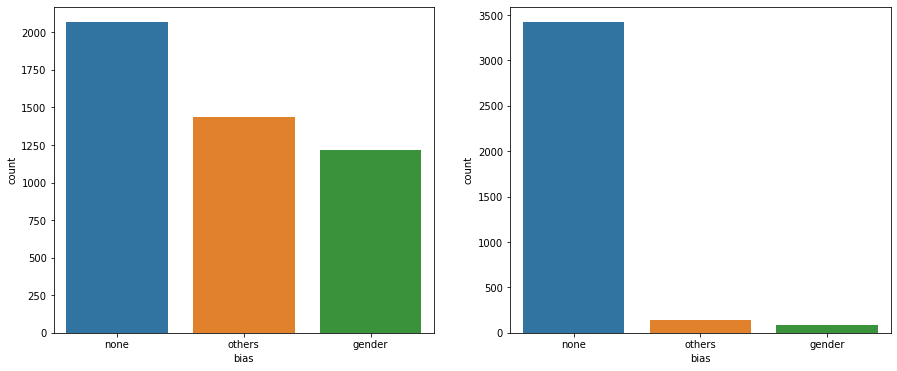

In [112]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.countplot(train[train['hate']=='hate']['bias'],ax = axes[0])
sns.countplot(train[train['hate']=='none']['bias'],ax = axes[1])

## 정규표현식을 이용하여 구두점, 언론사 정보 삭제

In [114]:
def clean_title(texts,new_list):
    review = re.sub(r'\[(.*?)\]'," ",texts) # 대괄호와 대괄호안의 문자 제거
    review = re.sub(r'\((.*?)\)'," ",review)# 괄호와 괄호안의 문자 제거
    review = re.sub(r'[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '',review) # 구두점 제거
    review = re.sub(r'\s+', ' ', review) #remove spaces
    review = re.sub(r"^\s+", '', review) #remove space from the start
    review = re.sub(r'\s+$', '', review) #remove space from the end
    review = re.sub(r'[^\w\s]','', review) # 띄어쓰기 제외한 모든 특수문자 제거
    new_list.append(review)
    return new_list

In [115]:
title=[]
for i in train['title']:
    clean_title(i,title)

In [116]:
title[:10]

['미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는',
 '극사실주의 현실가장 보통의 연애 김래원X공효진 16년만의 랑데부',
 '손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다',
 '섹션TV 김해숙 허스토리 촬영 후 우울증 얻었다',
 '임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면',
 '샤이니 온유 클럽 강제추행 무혐의 처분 받았다',
 '프듀2 김사무엘 父 멕시코서 숨진 채 발견타살 의혹 제기애도 물결',
 '슈 동안미모아찔한 수영복 자태로 시선강탈 밥을 먹을 수가 없네',
 'AOA 지민 앙상한 몸매건강이상설 직접 해명 건강합니다',
 '이 정도면 신드롬연예인들의 연예인 양준일 이지혜김이나신현준도 응원']

In [117]:
train['title'] = title

In [118]:
train['title']

0              미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는
1              극사실주의 현실가장 보통의 연애 김래원X공효진 16년만의 랑데부
2                  손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다
3                       섹션TV 김해숙 허스토리 촬영 후 우울증 얻었다
4       임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면
                           ...                    
8362                배우 이필립 SNS 스타 연인에게 초호화 프러포즈 눈길
8363                 마약백스텝김새롬 탓 실형 피한 이찬오 이미지는 치명상
8364                     그들만의 세상홍상수김민희 새해데이트에 반응싸늘
8365                      시크릿 마더 김소연 누가 죽였나송윤아와 갈등
8366                         허지웅소속사 악성림프종 진단 치료 전념
Name: title, Length: 8367, dtype: object

In [119]:
train

,title,comment,bias,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none
1,극사실주의 현실가장 보통의 연애 김래원X공효진 16년만의 랑데부,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,섹션TV 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none
4,임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면,난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none
...,...,...,...,...
8362,배우 이필립 SNS 스타 연인에게 초호화 프러포즈 눈길,아니 근데.튜닝한사람은 프러포즈받지도.결혼도못함?ㅋㅋㅋ지들은 돈없어서 못하는것들이ㅋ...,others,hate
8363,마약백스텝김새롬 탓 실형 피한 이찬오 이미지는 치명상,그러니깐 여자를 잘만나야되~징글징글한것들 만나면 인생 끝가지 돌아가게 되는듯.. 근...,gender,hate
8364,그들만의 세상홍상수김민희 새해데이트에 반응싸늘,참으로 아름다운 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...,none,none
8365,시크릿 마더 김소연 누가 죽였나송윤아와 갈등,재미가 없어요,none,none


### 타이틀 공백인 것 확인

In [120]:
for i,sentence in enumerate(title):
    if len(sentence) == 0:
        print(i)

2650
3780
6310


In [121]:
train.iloc[[2650,3780,6310],:]

,title,comment,bias,hate
2650,,"""응애 응애 엄마 저 맘에 안들죠? ........아들 ?? """" 너 내가 우스워 ...",none,hate
3780,,초콜릿' 드럽게 재미없다 ㅠㅠ 다들 공감하실듯,none,hate
6310,,남의 일에는 신경안써' 하고 쿨한척 하던 인간들. 강남한테는 악플 쓰고 있음ㅋㅋㅋ ...,none,hate


## 코멘트 구두점, 특수문자 제거

In [139]:
def clean_comment(texts):

    review = re.sub(r'[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '',texts) # 구두점 제거
    review = re.sub(r'\s+', ' ', review) #remove spaces
    review = re.sub(r"^\s+", '', review) #remove space from the start
    review = re.sub(r'\s+$', '', review) #remove space from the end
    review = re.sub(r'[^\w\s]','', review) # 띄어쓰기 제외한 모든 특수문자 제거
    
    return review

In [140]:
train["comment"] = train['comment'].apply(lambda x:clean_comment(x))

### 띄어쓰기 검사기, 한국어 맞춤법 계산기, soynlp 반복문 줄이기

In [125]:
from pykospacing import Spacing

In [128]:
spacing = Spacing()
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")


"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

In [129]:
from hanspell import spell_checker

In [130]:
from tqdm import tqdm

In [131]:
from soynlp.normalizer import *

In [132]:
print(repeat_normalize('와하하하하하하하하하핫'))

와하하핫


In [144]:
def spell_check_text(texts,comments_list):
    
    spaced_text = spacing(texts)
    spelled_sent = spell_checker.check(spaced_text)
    checked_sent = spelled_sent.checked
    normalized_sent = repeat_normalize(checked_sent)
    comments_list.append(normalized_sent)

In [148]:
normalized_comments=[]
for i in tqdm(train['comment']):
    spell_check_text(i,normalized_comments)

100% 8367/8367 [15:26<00:00,  9.03it/s]


In [149]:
normalized_comments[:10]

['김태리 정말 연기 잘해 진짜',
 '공효진 발 연기나 이질 생각이 없던데 왜 계속 주연일까',
 '누구처럼 돈만 밝히는 저급 인생은 살아가지 마시길 행복은 머니 순이 아니니깐 작은 거에 감사하고 항상 좋은 일만 가득하길',
 '일본 축구 져라',
 '난 절대로 임현주 욕하는 인간이랑은 안 논다',
 '만진 건 변하지 않는다 아이돌은 아이돌 좋아하는 여자들한테 이미지가 생명인데 얜 바닥 쳤고 같이 하는 멤버들도 끼리끼리로 보일 듯 ㅋㅋ',
 '연예계에 외국인 노동자 많네',
 '아이는 대부분 엄마가 원해서 낳고 독박 육아하고 남편은 그냥 따라고는 수준 싫은 내색도 못하고 심지어 부담스러워하더라',
 '먼 기사를 기대하고 사진을 올리는 지관 종',
 '개그맨 김경민 닮은다고 나만 느낌']

In [150]:
train['comment'] = normalized_comments

In [62]:
train.to_csv("train_normalized",index=False)

## test data 전처리

In [151]:
test["comment"] = test['comment'].apply(lambda x:clean_comment(x))

In [152]:
test_comments = []
for i in tqdm(range(len(test['comment']))):
    result = spell_checker.check(test['comment'][i])
    test_comments.append(result.checked)

100% 511/511 [00:27<00:00, 18.61it/s]


In [155]:
test['comment'] =test_comments

In [157]:
test['comment'][:10]

0                                      둘 다 너무 좋다 행복하세요
1              근데 만 원 이하는 현금결제만 하라고 써놓은 집 우리나라에 엄청 많은데
2                                               누군데 얘네
3    쇼 하지 마라 자식아 음주 1번은 실수 2번은 고의 3번은 인간쓰레기다 슬금슬금 기...
4    안검하수 가지고 있는 분께 희망을 주고 싶은 건가요 수술하면 이렇게 자연스러워진다고...
5    그건 불가능해 그냥 은퇴해서 평범하게 살아라 언제가 될지는 모르지만 시기가 문제일 ...
6    골목 살리고 지각하는 체인점 다 입점해서 때 돈 벌고 피디 술 사주고 지가 음식점 ...
7    근데 팬들이 나서야 되는데 왜 일반인들이 연애할 수도 있지 이 ㅈㄹ임 ㅋㅋㅋㅋ 내가...
8                               여자 같다 어깨도 너무 좁고 뜨긴 글렀네
9                                           좋게좋게 해결되시길
Name: comment, dtype: object

In [77]:
test.to_csv('test_normalized.csv',index=False)